In [1]:
import pandas as pd
import numpy as np

# Test the imports
data = {'column1': [1, 2, 3], 'column2': [4, 5, 6]}
df = pd.DataFrame(data)
print(df)

array = np.array([1, 2, 3])
print(array)

   column1  column2
0        1        4
1        2        5
2        3        6
[1 2 3]


In [2]:
!pip install pandas numpy matplotlib seaborn scikit-learn nltk textblob

Defaulting to user installation because normal site-packages is not writeable


In [3]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer  # Corrected
from sklearn.naive_bayes import MultinomialNB  # Corrected
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
import re

   column1  column2
0        1        4
1        2        5
2        3        6


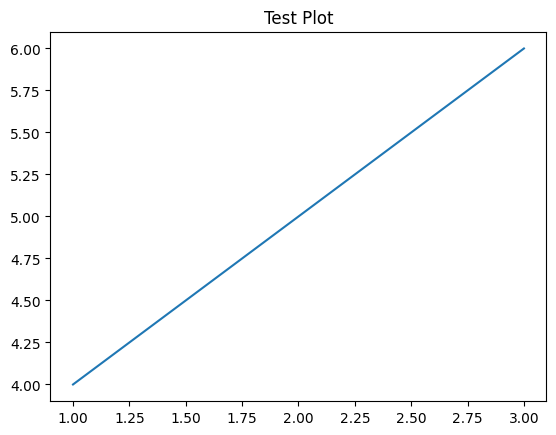

In [4]:
# Test pandas and numpy
data = {'column1': [1, 2, 3], 'column2': [4, 5, 6]}
df = pd.DataFrame(data)
print(df)

# Test matplotlib
plt.plot([1, 2, 3], [4, 5, 6])
plt.title("Test Plot")
plt.show()


In [5]:
# Load the dataset
file_path = "amazon.csv"  # Update the file path to match the location
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values in Dataset:\n", missing_values)

Missing Values in Dataset:
 product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [8]:
import matplotlib.pyplot as plt


In [9]:
!pip install matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable


In [10]:
import matplotlib.pyplot as plt


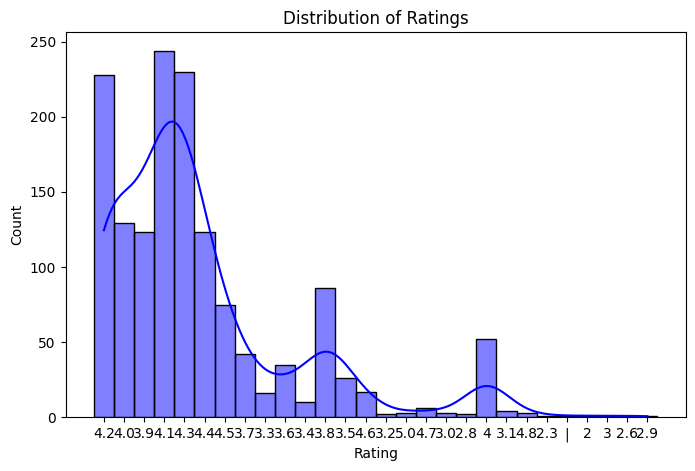

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'rating' column exists
if 'rating' in df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df['rating'].dropna(), bins=5, kde=True, color='blue')
    plt.title("Distribution of Ratings")
    plt.xlabel("Rating")
    plt.ylabel("Count")
    plt.show()
else:
    print("Column 'rating' not found in dataset.")


In [12]:
#Handling Missing Values
df.dropna(subset=['rating', 'rating_count', 'review_content'], inplace=True)

In [13]:
# Check missing values before handling
print("Missing Values Before Handling:\n", df.isnull().sum())

# Drop missing values
df.dropna(subset=['rating', 'rating_count', 'review_content'], inplace=True)

# Check missing values after handling
print("Missing Values After Handling:\n", df.isnull().sum())


Missing Values Before Handling:
 product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64
Missing Values After Handling:
 product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [14]:
# Convert rating and rating_count to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = df['rating_count'].astype(str).str.replace(',', '').astype(float)

In [15]:
print(df[['rating', 'rating_count']].dtypes)


rating          float64
rating_count    float64
dtype: object


In [16]:
#Clean price columns
df['discounted_price'] = df['discounted_price'].astype(str).str.replace(r'\D', '', regex=True).astype(float)
df['actual_price'] = df['actual_price'].astype(str).str.replace(r'\D', '', regex=True).astype(float)
df['discount_percentage'] = df['discount_percentage'].astype(str).str.replace('%', '').astype(float)

In [17]:
print(df[['discounted_price', 'actual_price', 'discount_percentage']].dtypes)


discounted_price       float64
actual_price           float64
discount_percentage    float64
dtype: object


In [18]:

df.drop_duplicates(subset=['review_id'], inplace=True)

In [19]:
print("Shape before removing duplicates:", df.shape)

df.drop_duplicates(subset=['review_id'], inplace=True)

print("Shape after removing duplicates:", df.shape)


Shape before removing duplicates: (1192, 16)
Shape after removing duplicates: (1192, 16)


In [20]:
from sklearn.preprocessing import LabelEncoder


In [21]:
le = LabelEncoder()
df['category'] = le.fit_transform(df['category'].astype(str))


In [22]:
print(df['category'].dtype)


int64


In [23]:
print(df[['review_content']].head())


                                      review_content
0  Looks durable Charging is fine tooNo complains...
1  I ordered this cable to connect my phone to An...
2  Not quite durable and sturdy,https://m.media-a...
3  Good product,long wire,Charges good,Nice,I bou...
4  Bought this instead of original apple, does th...


In [24]:
print(df[['review_content']].head(10))


                                       review_content
0   Looks durable Charging is fine tooNo complains...
1   I ordered this cable to connect my phone to An...
2   Not quite durable and sturdy,https://m.media-a...
3   Good product,long wire,Charges good,Nice,I bou...
4   Bought this instead of original apple, does th...
5   It's a good product.,Like,Very good item stron...
6   Build quality is good and it is comes with 2 y...
7   Worth for money - suitable for Android auto......
8   I use this to connect an old PC to internet. I...
10  The cable is efficient in fast charging but in...


In [25]:
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
print(df['review_content'].isnull().sum())  # Should return 0 if no missing values



0


In [27]:
#Text Preprocessing (Cleaning Reviews)
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    words = word_tokenize(text)
    words = [word for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

In [28]:
print(df.columns)


Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')


In [29]:
print(clean_text)


<function clean_text at 0x000002925C00AF20>


In [30]:
def clean_text(text):
    if pd.isna(text):  # Handle NaN values
        return ""
    
    text = str(text).lower()
    text = re.sub(r"[^a-zA-Z0-9\s']", ' ', text)  # Ensure proper regex formatting
    words = word_tokenize(text)
    words = [word for word in words if word not in stopwords.words('english')]
    return ' '.join(words)


In [31]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
# Step 8: Sentiment Labeling
def assign_sentiment(rating):
    if rating >= 4.0:
        return 'Positive'
    elif rating >= 2.0:
        return 'Neutral'
    else:
        return 'Negative'

df['sentiment'] = df['rating'].apply(assign_sentiment)


In [33]:
print(df[['rating', 'sentiment']].head(10))


    rating sentiment
0      4.2  Positive
1      4.0  Positive
2      3.9   Neutral
3      4.2  Positive
4      4.2  Positive
5      3.9   Neutral
6      4.1  Positive
7      4.3  Positive
8      4.2  Positive
10     4.3  Positive


In [34]:
#Save Processed Data
df.to_csv("processed_amazon.csv", index=False)

In [35]:
import os
print(os.path.exists("processed_amazon.csv"))


True


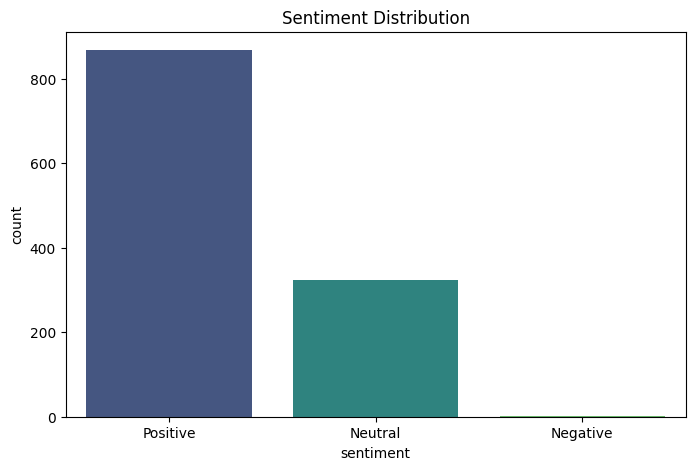

In [36]:
plt.figure(figsize=(8,5))
sns.countplot(x='sentiment', data=df, hue='sentiment', palette='viridis', legend=False)
plt.title("Sentiment Distribution")
plt.show()


In [37]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')


In [39]:
print(df.columns)


Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'sentiment'],
      dtype='object')


In [40]:
print("Columns in DataFrame:", df.columns)
print(df.head())  # Check if 'cleaned_review' appears


Columns in DataFrame: Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'sentiment'],
      dtype='object')
   product_id                                       product_name  category  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...        10   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...        10   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...        10   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...        10   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...        10   

   discounted_price  actual_price  discount_percentage  rating  rating_count  \
0             399.0        1099.0                 64.0     4.2       24269.0   
1             199.0         349.0         

In [42]:
from nltk.corpus import stopwords
print(stopwords.words('english')[:10])  # Should print first 10 stopwords


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [43]:
def clean_text(text):
    if pd.isna(text):  # Handle missing values
        return ""

    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)  # Remove special characters
    words = word_tokenize(text)  # Tokenize words

    stop_words = set(stopwords.words('english'))  # Load stopwords
    words = [word for word in words if word not in stop_words]  # Remove stopwords

    return ' '.join(words)  # Return cleaned text


In [44]:
print(df.columns)  # This will list all available columns


Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'sentiment'],
      dtype='object')
